In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [305]:
df = pd.read_csv('D:/Downloads/t2d.csv',index_col = 'Pid')

In [306]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Pid,,,,,,,,,,,,,,,,,,,,,
8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


# DATA CLEANING

In [307]:
#Since all variables except target are numerical, describe would be helpful to understand distribution.
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,566.000000,566.000000,569.000000,569.000000,...,569.000000,546.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.089270,0.049178,0.181162,0.062798,...,16.269190,25.675385,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079667,0.038741,0.027414,0.007060,...,4.833242,6.156301,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029680,0.020413,0.161900,0.057700,...,13.010000,21.085000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061680,0.033770,0.179200,0.061540,...,14.970000,25.405000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.131600,0.074030,0.195700,0.066120,...,18.790000,29.705000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 8670 to 911320502
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           566 non-null    float64
 8   concave points_mean      566 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se          

In [309]:
df.shape

(569, 31)

In [310]:
df.isna().sum()

diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean              3
concave points_mean         3
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                3
concave points_se           2
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst              23
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

We see a few columns with missing values, major one being texture_worse. We will now find the distribution 
of this column to find out how to impute missing values. We can leave the other columns as it is


Mean TW: 25.67538461538458


D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


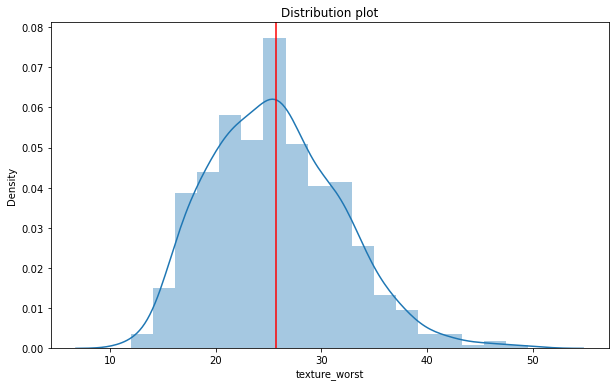

In [311]:
#Distribution plot 
tw = df['texture_worst'].describe()
print('Mean TW: {}'.format(tw['mean']))

plt.figure(figsize = (10, 6))
sns.distplot(df['texture_worst'])
plt.title('Distribution plot')
plt.axvline(tw['mean'], linestyle = '-', color = "red")


We see that the data is not much skewed, hence we use mean to impute the missing values.

In [312]:
#IMPUTING MISSING VALUES
df['texture_worst'] = df['texture_worst'].fillna(df['texture_worst'].mean())

In [313]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             3
concave points_mean        3
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               3
concave points_se          2
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


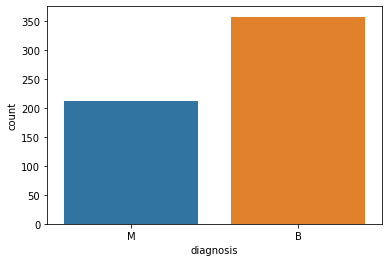

In [314]:
sns.countplot(df["diagnosis"]);

In [315]:
#CONVERTING TARGET TO 0 AND 1 FOR EASY ANALYSIS
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})


#Since there is an imabalance, we would use oversampling

In [316]:
import math

In [317]:
def _oversampling(df, target):
    """ Oversample the minority classes to match
    the majority class.
    
    :param df: pandas dataframe - input df.
    :param target: string - classification target column.

    :return: pandas datframe - oversampled version
    """

    class_count = df[target].value_counts()

    print("Before oversampling: %s" % class_count)
    
    for i in range(1,len(class_count)):
        df_i = df[df[target] == i]
        oversampling_factor_i = class_count[0] / float(class_count[i])
        print(len(df_i))
        print("Oversampling factor for class %i: %s" %(i, str(oversampling_factor_i)))
    
        # Integer part of oversampling
        df = df.append(
            [df_i] * int(math.floor(oversampling_factor_i) - 1),
            ignore_index=False)
        
        # Float part of oversampling
        df = df.append(
            [df_i.sample(frac=oversampling_factor_i % 1)],
            ignore_index=False)
    
    print("After oversampling: %s" % df[target].value_counts())
    print("Shape after oversampling: %s" % str(df.shape))

    return df

In [318]:
dfo=_oversampling(df,'diagnosis')

Before oversampling: 0    357
1    212
Name: diagnosis, dtype: int64
212
Oversampling factor for class 1: 1.6839622641509433
After oversampling: 0    357
1    357
Name: diagnosis, dtype: int64
Shape after oversampling: (714, 31)


In [319]:
#Now our data has almost no missing values and target variable is ready

# EDA

array([[<AxesSubplot:title={'center':'diagnosis'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_

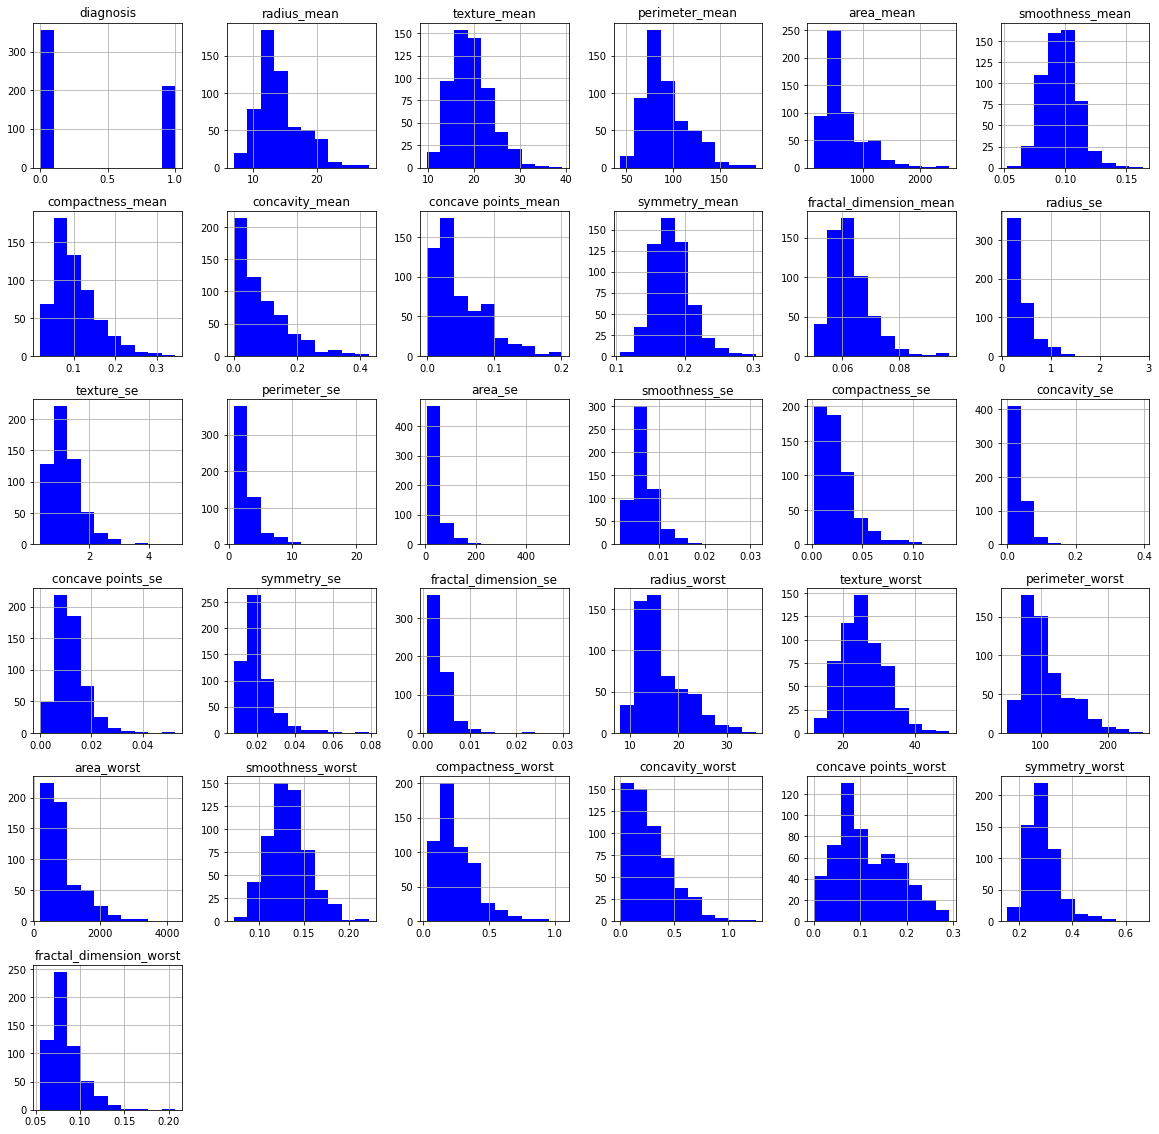

In [320]:
#To check for outliers
df.hist(figsize=(20,20),color="blue")

In [323]:
#Treating outliers

from scipy.stats.mstats import winsorize

# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.05],inclusive=(True, True))
    
    return dataframe 

treat_outliers(dfo)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Pid,,,,,,,,,,,,,,,,,,,,,
8670,1,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
8913,0,12.89,13.17,81.89,515.9,0.07618,0.04276,0.02260,0.01171,0.1432,...,13.62,16.93,87.40,577.0,0.09861,0.1147,0.1186,0.05366,0.2309,0.06915
8915,0,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
9047,0,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
85715,1,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.80,759.4,0.17770,0.4166,0.5006,0.20880,0.3900,0.11790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910988,1,21.09,20.99,140.90,1384.0,0.09401,0.19610,0.21950,0.10880,0.1721,...,26.46,28.18,180.20,2145.0,0.12720,0.4725,0.5807,0.18410,0.2833,0.08858
889719,1,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,...,21.58,29.33,140.50,1436.0,0.15580,0.2567,0.3889,0.19840,0.3216,0.07570
877159,1,18.08,21.84,117.40,1024.0,0.07618,0.08642,0.11030,0.05778,0.1770,...,19.76,24.70,129.10,1228.0,0.09861,0.1963,0.2535,0.09181,0.2369,0.06558


array([[<AxesSubplot:title={'center':'diagnosis'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_

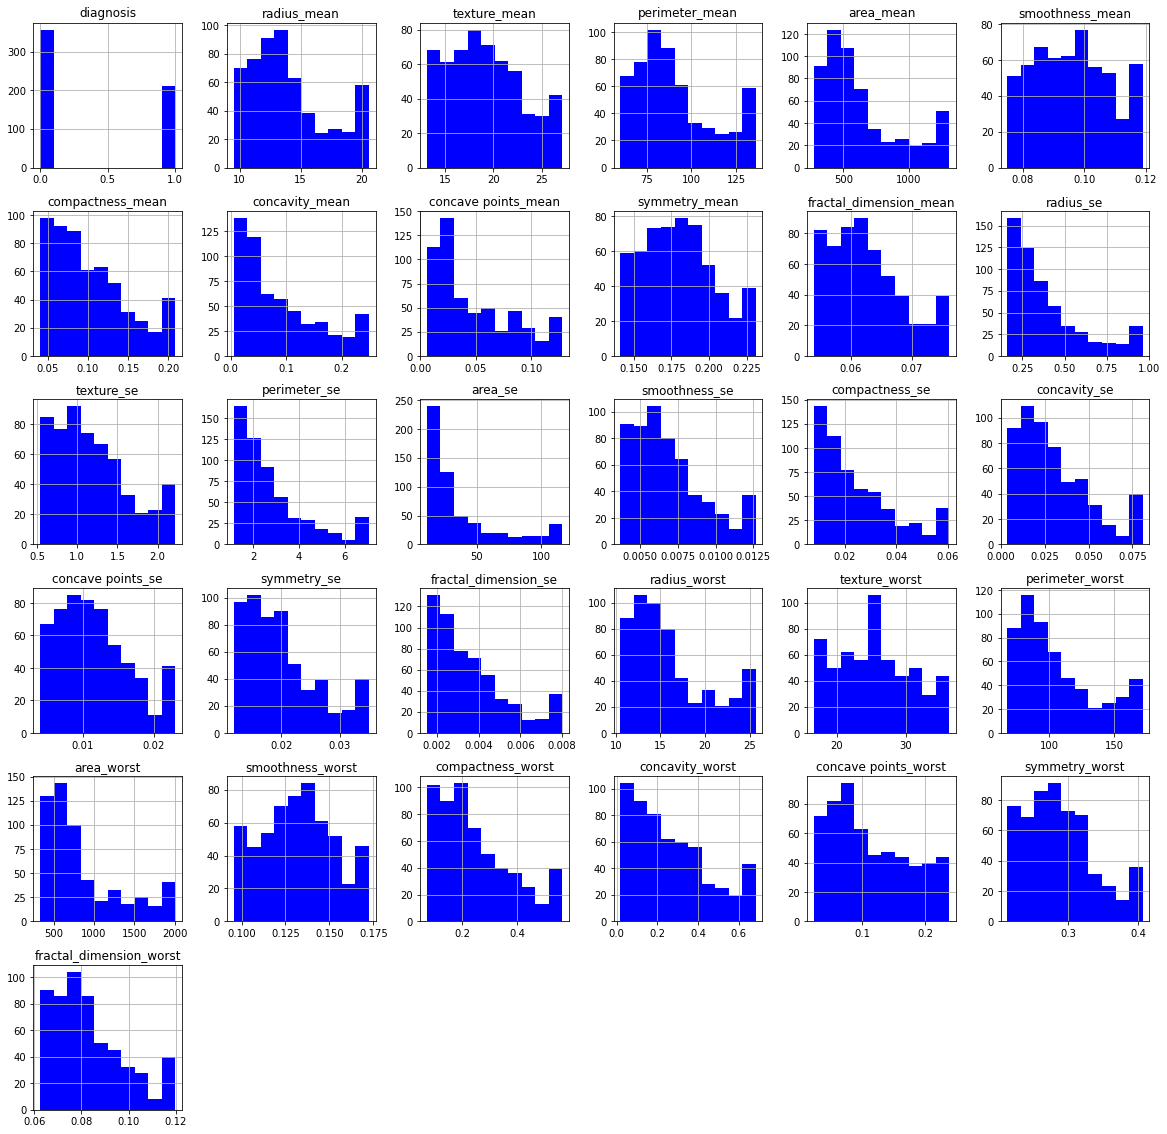

In [322]:
df.hist(figsize=(20,20),color="blue")

In [244]:
#WE CAN SEE A HUGE CHANGE IN THE DISTRIBUTION GRAPHS OF THE VARIABLE

In [247]:
corr_matrix=df.corr()

<AxesSubplot:>

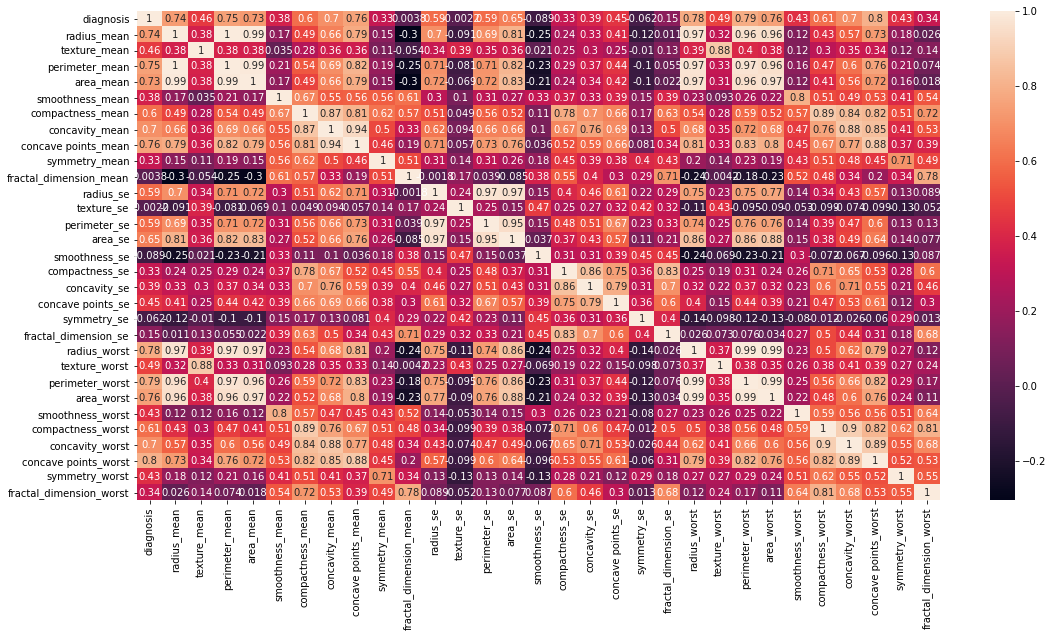

In [248]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot = True)

1. We see high correlations between many columns. PCA would be a useful technique to perform dimentionality reduction


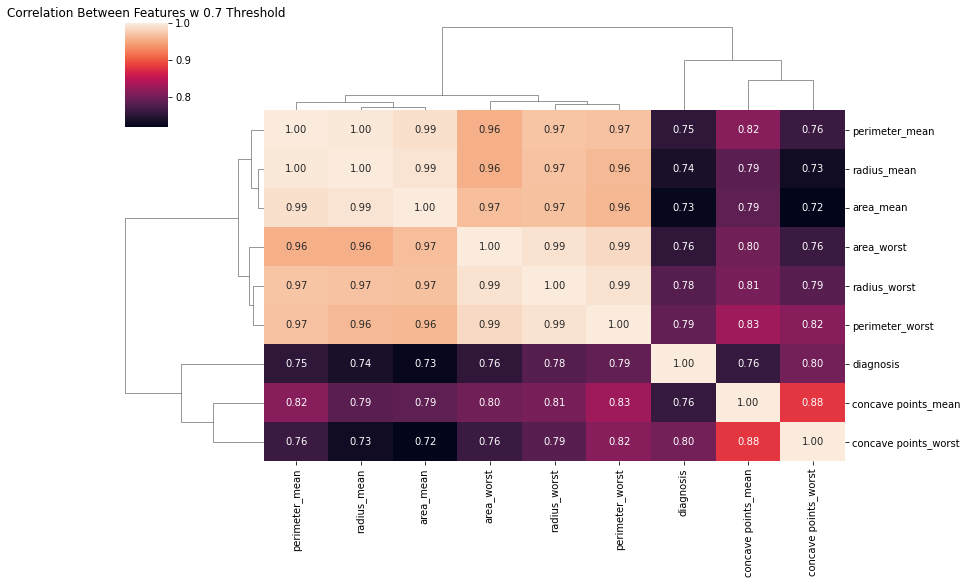

In [249]:
threshold = 0.7
filter_ = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filter_].tolist()
sns.clustermap(df[corr_features].corr(),annot=True,fmt=".2f",figsize=(12,8));
plt.title("Correlation Between Features w 0.7 Threshold");
plt.show();

We see that these variables are extremely useful and would probably be there after dimentionality reduction

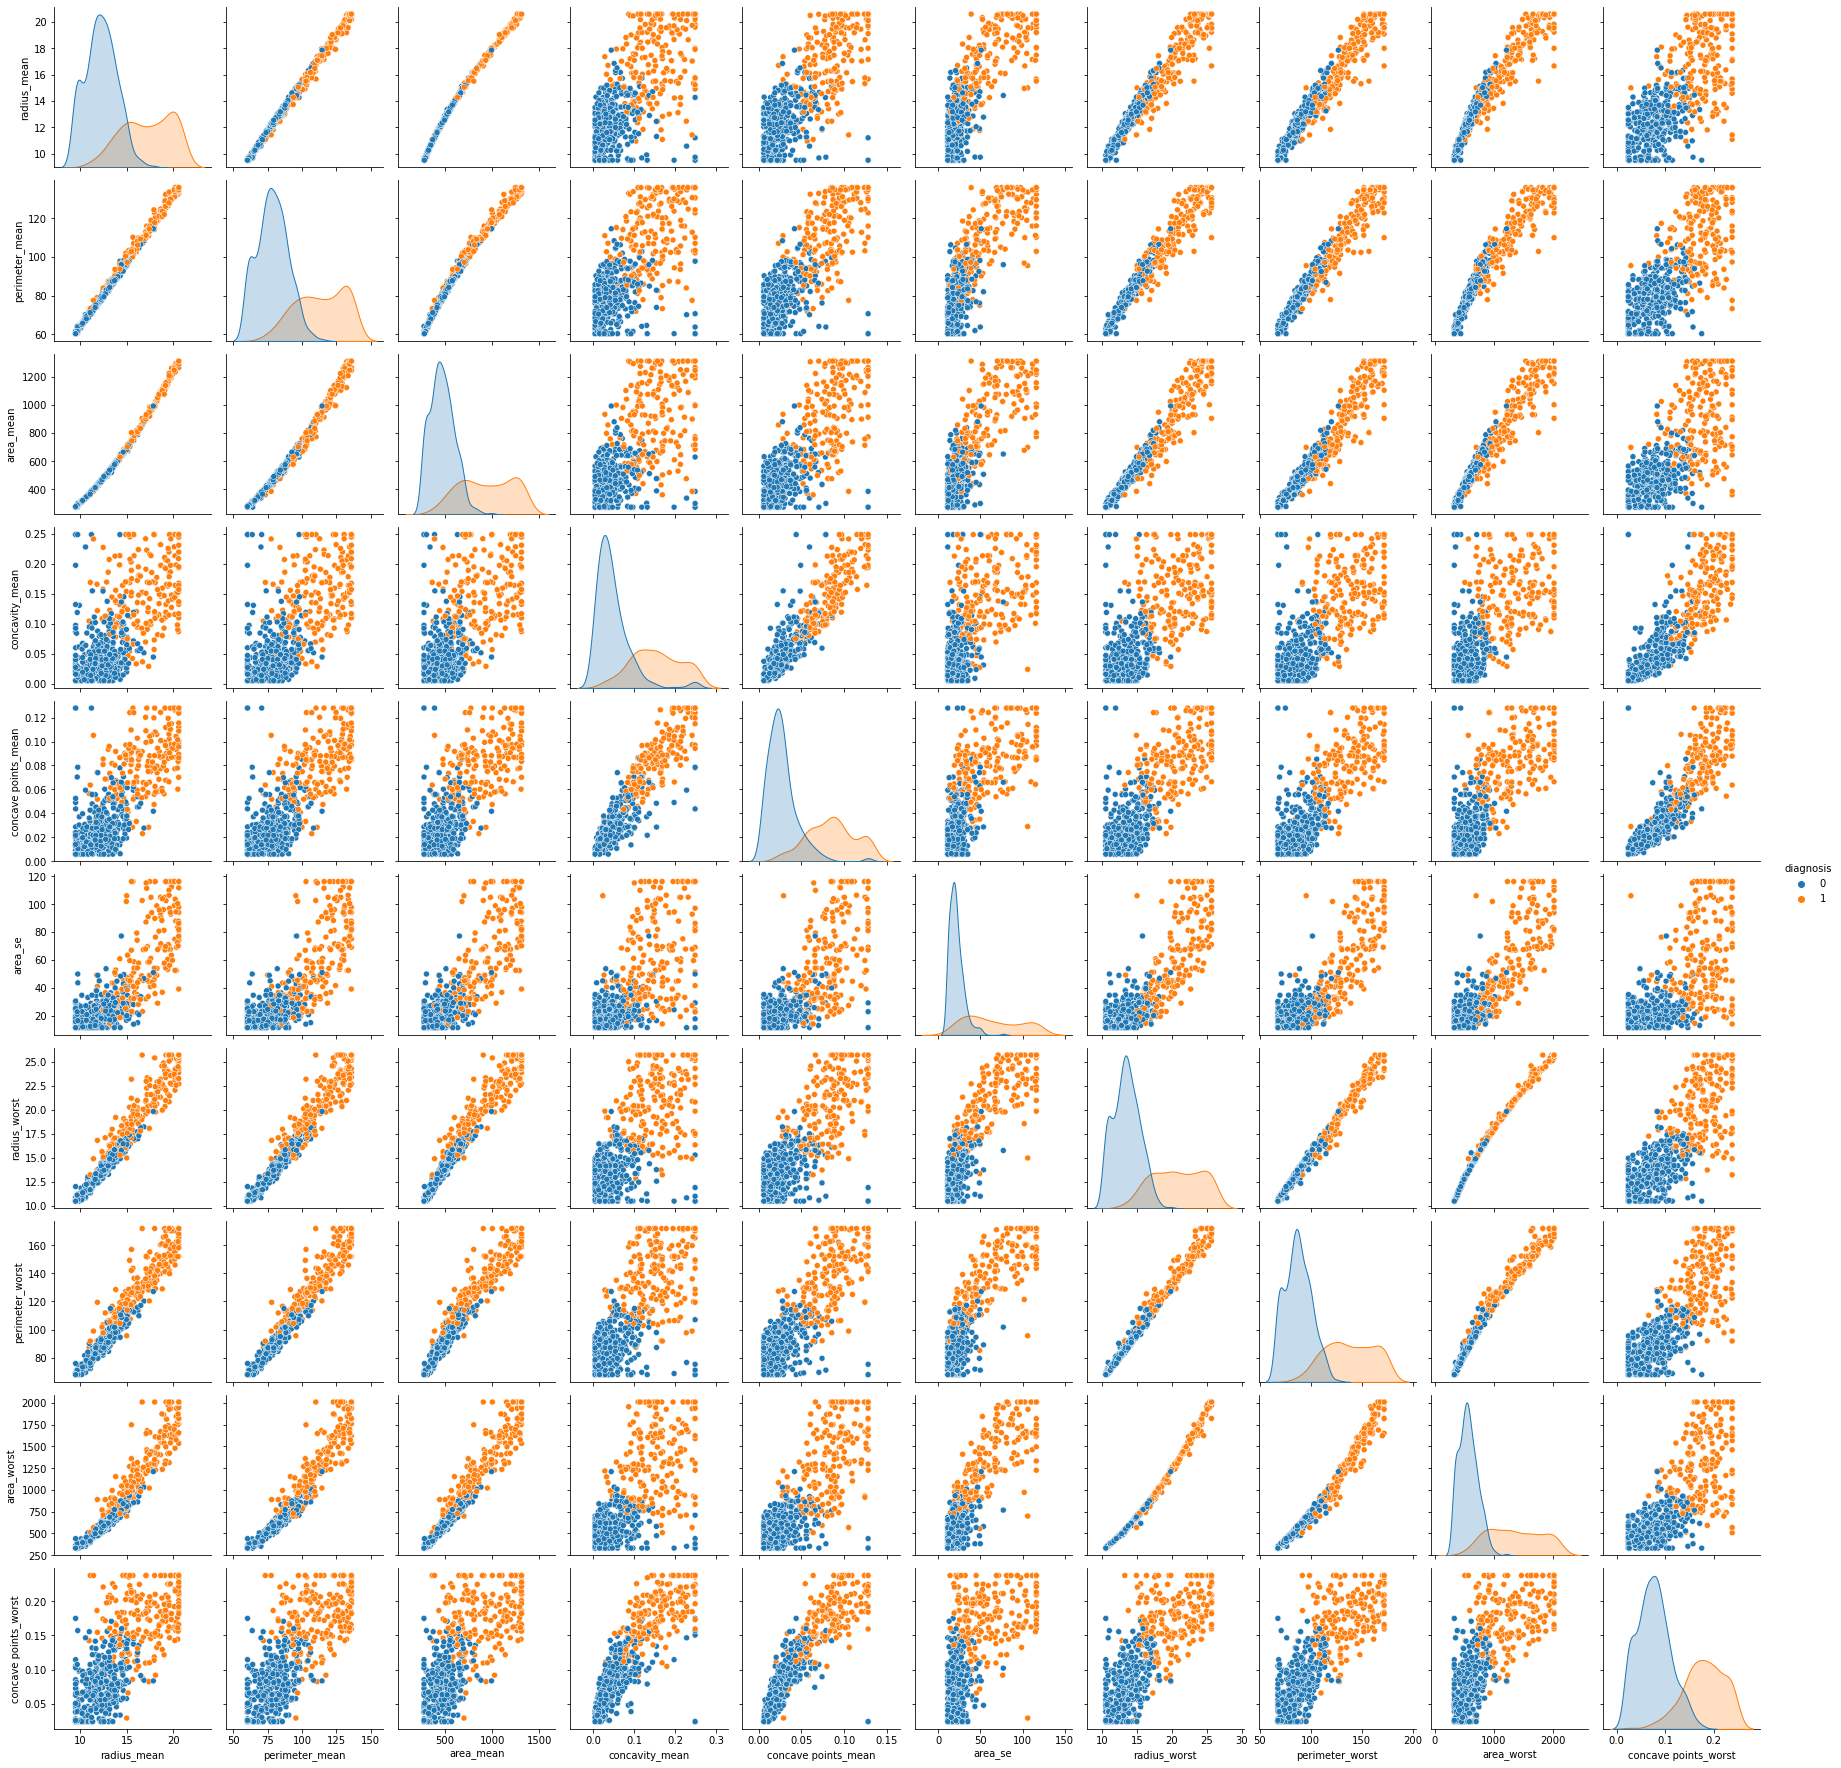

In [187]:
sns.pairplot(df[corr_features],diag_kind="kde",kind='scatter',hue="diagnosis")
plt.show();

In [250]:
#We see that there is correlation among most the above selected pairs of variables and that only a few are separately ditributed

# Preparing data

In [324]:
#Splitting the dataset into Independent and Dependent variables

X= dfo.drop(['diagnosis'],axis = 1)

y= dfo['diagnosis']

y.value_counts()



0    357
1    357
Name: diagnosis, dtype: int64

In [325]:
#Training data and testing data
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [326]:
#Standardizing the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# DIMENTIONALITY REDUCTION

In [343]:
# Importing standardscalar module
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(X)
y_target = pd.DataFrame(y)
scalar = StandardScaler()

# fitting
scalar.fit(df)
scaled_data = scalar.transform(df)

# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components = 0.95)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(x_pca.shape)
PCA_df = pd.DataFrame(x_pca)
PCA_df.head()

(714, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.781928,-1.059452,-1.357544,-0.453562,-0.867699,-0.925732,0.613353,0.384352,-0.500039,0.493415
1,-5.271344,-2.000127,-0.497983,-1.632144,1.722686,0.274448,0.050699,-0.141438,0.130282,-0.282944
2,-1.233447,-0.789528,-1.161915,0.104398,0.240184,0.323171,0.155704,0.055402,-0.091449,0.523917
3,-3.423318,-0.279474,-1.611603,-0.484352,-0.064751,0.977457,-0.001963,0.766983,-0.002890,-0.388603
4,1.141696,2.769901,-3.290467,0.185123,-1.144972,-0.196387,0.347302,-0.187199,-0.489849,-0.066951


WE SEE THAT AROUND 10 VARIABLES CAN WELL EXPLAIN 95% VARIABILITY IN MY TARGET VARIABLE

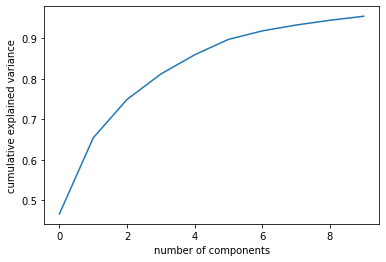

In [344]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

NOW THAT WE HAVE IN HAND OUR DIMENTIONALITY REDUCED DATA, WE WOULD GO FOR MODELLING

# MODELLING

In [345]:
XP_train, XP_test, yP_train, yP_test = train_test_split(PCA_df, y, test_size=0.2,random_state=1)

In [346]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(XP_train, yP_train)
yP_pred = classifier.predict(XP_test)
yP_pred2 = classifier.predict(XP_train)

In [347]:
#VISUALISATION AND INTERPRETATION

In [348]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm1 = confusion_matrix(yP_test, yP_pred)

print(cm1)
print('Accuracy: ' + str(accuracy_score(yP_test, yP_pred)))

[[61  2]
 [ 2 78]]
Accuracy: 0.972027972027972


WE GET A 97.2% ACCURACY SCORE AFTER USING THE SELECTED VARIABLE (I.E 10 VARIABLE)
WE ALSO HAVE THE CONFUSION MATRIX

In [349]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X1_train, y1_train)
y1_pred = classifier.predict(X1_test)
y1_pred2 = classifier.predict(X1_train)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [350]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm2 = confusion_matrix(y1_test, y1_pred)

print(cm2)
print('Accuracy: ' + str(accuracy_score(y1_test, y1_pred)))

[[59  4]
 [ 6 74]]
Accuracy: 0.9300699300699301
